In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 0: Create the dataset
data = np.array([
    [170, 70, 30],
    [160, 60, 25],
    [180, 80, 35],
    [165, 65, 28],
    [175, 75, 32]
])

print("Original Data:")
print(data)

Original Data:
[[170  70  30]
 [160  60  25]
 [180  80  35]
 [165  65  28]
 [175  75  32]]


In [3]:
# Step 1: Standardize the data
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
data_standardized = (data - mean) / std

print("\nStep 1: Standardized Data:")
print(data_standardized)


Step 1: Standardized Data:
[[ 0.          0.          0.        ]
 [-1.41421356 -1.41421356 -1.46805055]
 [ 1.41421356  1.41421356  1.46805055]
 [-0.70710678 -0.70710678 -0.58722022]
 [ 0.70710678  0.70710678  0.58722022]]


In [7]:
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(data_standardized.T)

print("\nStep 2: Covariance Matrix:")
print(cov_matrix)


Step 2: Covariance Matrix:
[[1.25      1.25      1.2456822]
 [1.25      1.25      1.2456822]
 [1.2456822 1.2456822 1.25     ]]


In [8]:
# Step 3: Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\nStep 3: Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Step 3: Eigenvalues:
[ 3.74424404e+00 -3.67140304e-17  5.75596139e-03]

Eigenvectors:
[[-5.77572456e-01 -7.07106781e-01 -4.07933890e-01]
 [-5.77572456e-01  7.07106781e-01 -4.07933890e-01]
 [-5.76905639e-01 -1.30334488e-14  8.16810800e-01]]


In [9]:
# Step 4: Sort eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("\nStep 4: Sorted Eigenvalues:")
print(eigenvalues)
print("\nSorted Eigenvectors:")
print(eigenvectors)


Step 4: Sorted Eigenvalues:
[ 3.74424404e+00  5.75596139e-03 -3.67140304e-17]

Sorted Eigenvectors:
[[-5.77572456e-01 -4.07933890e-01 -7.07106781e-01]
 [-5.77572456e-01 -4.07933890e-01  7.07106781e-01]
 [-5.76905639e-01  8.16810800e-01 -1.30334488e-14]]


In [10]:
# Step 5: Choose top k eigenvectors and project data
k = 2  # We want 2 principal components
W = eigenvectors[:, :k]

print("\nStep 5: Transformation Matrix (top 2 eigenvectors):")
print(W)

# Transform the data
data_transformed = np.dot(data_standardized, W)

print("\nTransformed Data (projected onto 2 PCs):")
print(data_transformed)


Step 5: Transformation Matrix (top 2 eigenvectors):
[[-0.57757246 -0.40793389]
 [-0.57757246 -0.40793389]
 [-0.57690564  0.8168108 ]]

Transformed Data (projected onto 2 PCs):
[[ 0.          0.        ]
 [ 2.48054824 -0.04530826]
 [-2.48054824  0.04530826]
 [ 1.15558146  0.09725782]
 [-1.15558146 -0.09725782]]


In [11]:
data_standardized.shape

(5, 3)

In [12]:
 W.shape

(3, 2)

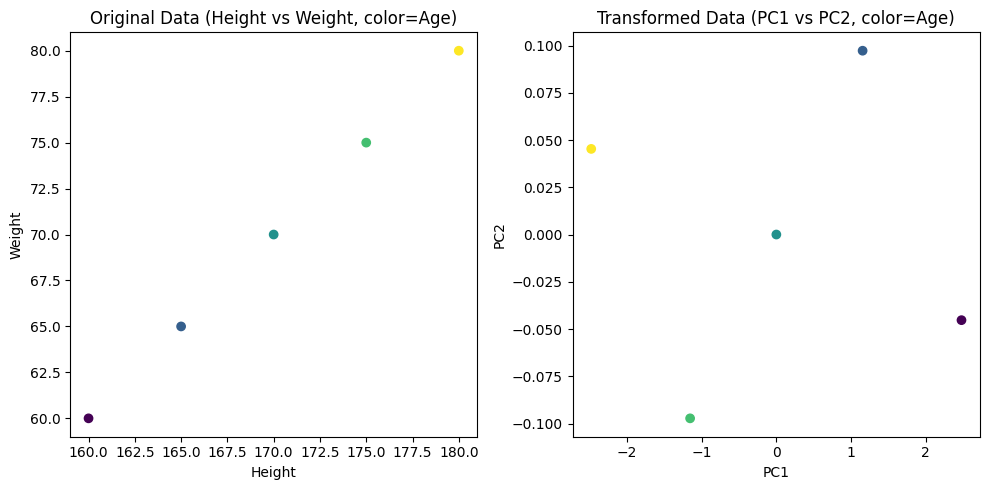


Explained Variance Ratio:
[ 9.98465077e-01  1.53492304e-03 -9.79040810e-18]
Total Variance Explained by 2 PCs: 100.00%


In [13]:
# Visualize the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2])
plt.title('Original Data (Height vs Weight, color=Age)')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.subplot(1, 2, 2)
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=data[:, 2])
plt.title('Transformed Data (PC1 vs PC2, color=Age)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

# Calculate and print explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print(f"Total Variance Explained by 2 PCs: {np.sum(explained_variance_ratio[:2]):.2%}")


Transformed Data (projected onto 2 PCs):
[[ 0.          0.        ]
 [ 2.48054824 -0.04530826]
 [-2.48054824  0.04530826]
 [ 1.15558146  0.09725782]
 [-1.15558146 -0.09725782]]

Correlation between PC1 and PC2:
-1.1769032365427456e-15
Note: This value should be very close to 0, indicating no correlation.


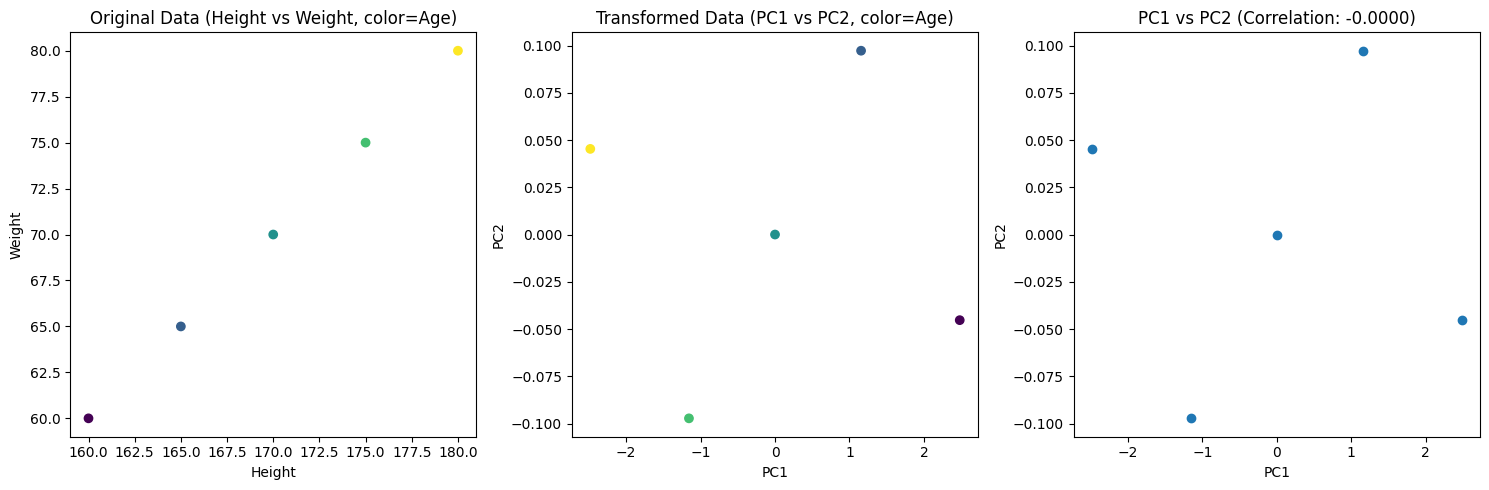


Explained Variance Ratio:
[ 9.98465077e-01  1.53492304e-03 -9.79040810e-18]
Total Variance Explained by 2 PCs: 100.00%


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ... [Previous code remains the same up to the data transformation] ...

# Transform the data
data_transformed = np.dot(data_standardized, W)

print("\nTransformed Data (projected onto 2 PCs):")
print(data_transformed)

# New part: Check correlation between PC1 and PC2
correlation_matrix = np.corrcoef(data_transformed.T)
pc1_pc2_correlation = correlation_matrix[0, 1]

print("\nCorrelation between PC1 and PC2:")
print(pc1_pc2_correlation)
print("Note: This value should be very close to 0, indicating no correlation.")

# Bonus: Visualize the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2])
plt.title('Original Data (Height vs Weight, color=Age)')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.subplot(1, 3, 2)
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=data[:, 2])
plt.title('Transformed Data (PC1 vs PC2, color=Age)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# New plot: Correlation between PC1 and PC2
plt.subplot(1, 3, 3)
plt.scatter(data_transformed[:, 0], data_transformed[:, 1])
plt.title(f'PC1 vs PC2 (Correlation: {pc1_pc2_correlation:.4f})')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

# Bonus: Calculate and print explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print(f"Total Variance Explained by 2 PCs: {np.sum(explained_variance_ratio[:2]):.2%}")